In [1]:
import random as r,csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

'''GENERATE DATA'''
N = 1000
with open('data.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["x0","x1","x2","y1","y2","class"])
    i = 0
    while(i<N):
        x = np.random.uniform(-5,5)
        y = np.random.uniform(-5,5)
        if(x**2 + y**2 > 9):
            writer.writerow(["1",str(x),str(y),"1","0","1"]); i+=1
        elif(x**2 + y**2 <=4):
            writer.writerow(["1",str(x),str(y),"0","1","2"]); i+=1


In [2]:
df = pd.read_csv('data.csv')
print(df)

     x0        x1        x2  y1  y2  class
0     1  3.041562  2.542459   1   0      1
1     1  3.071206  4.791569   1   0      1
2     1 -1.656859 -4.377488   1   0      1
3     1 -2.931877 -2.528238   1   0      1
4     1  2.401745  4.420449   1   0      1
5     1  3.986954  0.703226   1   0      1
6     1  4.664363 -4.629920   1   0      1
7     1 -3.701618 -2.083802   1   0      1
8     1  3.220806  0.643892   1   0      1
9     1  0.375029 -4.159883   1   0      1
10    1 -0.078155  4.339066   1   0      1
11    1 -1.755439 -3.419481   1   0      1
12    1 -1.245641  1.178538   0   1      2
13    1 -1.973395 -4.344767   1   0      1
14    1  1.685835 -3.017622   1   0      1
15    1  4.973570 -3.497884   1   0      1
16    1 -4.671556 -4.764543   1   0      1
17    1  2.909845  2.406891   1   0      1
18    1 -0.801520 -1.051481   0   1      2
19    1 -2.643857  3.527019   1   0      1
20    1 -3.428019 -0.554004   1   0      1
21    1  0.108943 -3.030883   1   0      1
22    1  4.

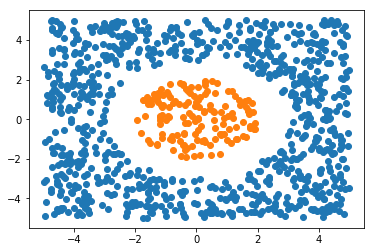

In [3]:
groups = df.groupby('class')
fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.x1, group.x2, marker='o', linestyle='')
plt.show()

In [4]:
N = len(df)
h = 3
C = 2
d = 2

In [5]:

u1 = np.random.rand(N,h+1)
v1 = np.random.rand(N,h+1)
u2 = np.random.rand(N,2)
v2 = np.random.rand(N,2)

w1 = np.random.rand(h+1,d+1)
w2 = np.random.rand(2,h+1)


print(w1)
print()
print(w2)
print()
X = df[['x0','x1','x2']].values
y = df[['y1','y2','class']].values

trainset = int(0.7*N)
testset = N

print(X)
print(y)

[[0.23004986 0.94001753 0.37217918]
 [0.28829958 0.39409393 0.99730569]
 [0.36607291 0.6371448  0.65372426]
 [0.90458564 0.37987546 0.23177991]]

[[0.25573179 0.98978435 0.79263483 0.91956257]
 [0.60170814 0.8708276  0.42684588 0.53417069]]

[[ 1.          3.04156205  2.54245884]
 [ 1.          3.07120649  4.79156901]
 [ 1.         -1.65685891 -4.37748804]
 ...
 [ 1.          2.86963616  1.44813698]
 [ 1.         -3.09623954  4.61328259]
 [ 1.          3.7569938   3.90392696]]
[[1 0 1]
 [1 0 1]
 [1 0 1]
 ...
 [1 0 1]
 [1 0 1]
 [1 0 1]]


In [6]:
import math
def phi(x):
    return 1/(1.0+math.exp(-x))

def dphi(x):
    return phi(x)*(1-phi(x))

def calcU1nj(n,j):
    s = 0
    for i in range(d+1):
        s += w1[j][i]*X[n][i]
    return s

def calcU2nk(n,k):
    s = 0
    for j in range(h+1):
        s += w2[k][j]*v1[n][j]
    return s

In [7]:
# Algorithm
epoch = 100
eta = 0.1
errors = []
error = 10**5 ; e = 0
while(error>0.015):
    error = 0
    e += 1
    for n in range(trainset):
        for j in range(1,h+1):
            u1[n][j] = calcU1nj(n,j)
            v1[n][j] = phi(u1[n][j])
        err = 0
        for k in range(C):
            u2[n][k] = calcU2nk(n,k)
            v2[n][k] = phi(u2[n][k])
            err += (1/2)*((v2[n][k] - y[n][k])**2)
        
        error += err
        # Backprop
        for k in range(C):
            for j in range(h+1):
                w2[k][j] += eta*(y[n][k]-v2[n][k])*dphi(u2[n][k])*v1[n][j]
        for i in range(d+1):
            for j in range(1,h+1):
                w1[j][i] += eta*dphi(u1[n][j])*X[n][i]*sum([(y[n][k] - v2[n][k])*dphi(u2[n][k])*w2[k][j] for k in range(C)])
    error = error/trainset
    print("Epoch :", e, "Training Error : ", error)
    errors.append(error)


Epoch : 1 Training Error :  0.15195609898300413
Epoch : 2 Training Error :  0.1210877590705402
Epoch : 3 Training Error :  0.11976780745871106
Epoch : 4 Training Error :  0.11901294104734463
Epoch : 5 Training Error :  0.11850993360261279
Epoch : 6 Training Error :  0.11816679272521836
Epoch : 7 Training Error :  0.1179242300305111
Epoch : 8 Training Error :  0.11773312693069374
Epoch : 9 Training Error :  0.1175532460180676
Epoch : 10 Training Error :  0.11735017238143686
Epoch : 11 Training Error :  0.11708866620457316
Epoch : 12 Training Error :  0.11672870496392014
Epoch : 13 Training Error :  0.11622923957827705
Epoch : 14 Training Error :  0.11555646123179707
Epoch : 15 Training Error :  0.11468441011500151
Epoch : 16 Training Error :  0.11358711346862957
Epoch : 17 Training Error :  0.11223537277595488
Epoch : 18 Training Error :  0.11060331011705635
Epoch : 19 Training Error :  0.10868072470275779
Epoch : 20 Training Error :  0.10648656791814888
Epoch : 21 Training Error :  0.1

Optimal w1 : 
 [[ 0.23004986  0.94001753  0.37217918]
 [-5.26930644  0.85222085  2.67875804]
 [-3.79189708  1.31595739 -1.74196167]
 [ 5.99210634  3.54127789  0.41588389]]
Optimal w2 : 
 [[ 3.39725738  8.2141326   8.45517787 -6.22370573]
 [-3.39734133 -8.21437287 -8.45541207  6.22390141]]


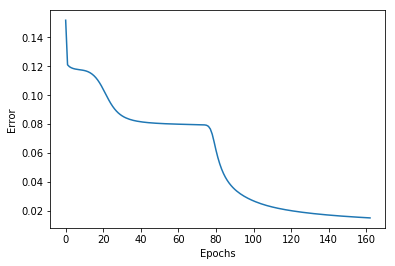

In [8]:
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.plot(range(len(errors)),errors)
print("Optimal w1 : \n",w1)
print("Optimal w2 : \n",w2)

Accuracy :  0.99


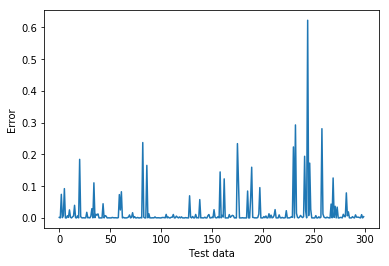

In [9]:
# testing
testerrors = []
correct = 0
for n in range(trainset,N):
    for j in range(1,h+1):
        u1[n][j] = calcU1nj(n,j)
        v1[n][j] = phi(u1[n][j])
    error = 0
    for k in range(2):
        u2[n][k] = calcU2nk(n,k)
        v2[n][k] = phi(u2[n][k])
        error += (v2[n][k] - y[n][k])**2
    
    # check for misclassification
    c = np.argmax(v2[n])+1
    if(c==y[n][2]):
        correct+=1
    testerrors.append(error/2)
print("Accuracy : ",correct/(N-trainset))

plt.xlabel('Test data')
plt.ylabel('Error')
plt.plot(range(len(testerrors)),testerrors)